In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt=
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, auc


In [50]:
# Load the dataset
data = pd.read_csv('heart.csv')


In [51]:
# Check for missing values
print(data.isnull().sum())

# Encode categorical variables (if necessary)
# Example: data['sex'] = data['sex'].map({1: 'male', 0: 'female'})

# Split the data into features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [52]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [53]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84
ROC AUC: 0.84


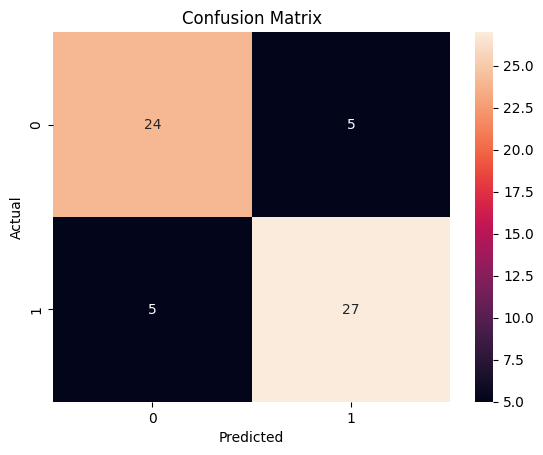

In [54]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


C:\Users\Vaibhavi\AppData\Local\Temp\ipykernel_22716\1382478905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette="viridis")


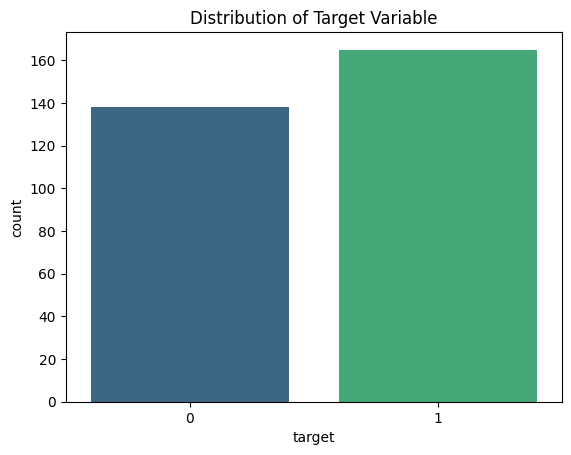

In [55]:
# Plot distribution of target variable
sns.countplot(x='target', data=data, palette="viridis")
plt.title('Distribution of Target Variable')
plt.show()


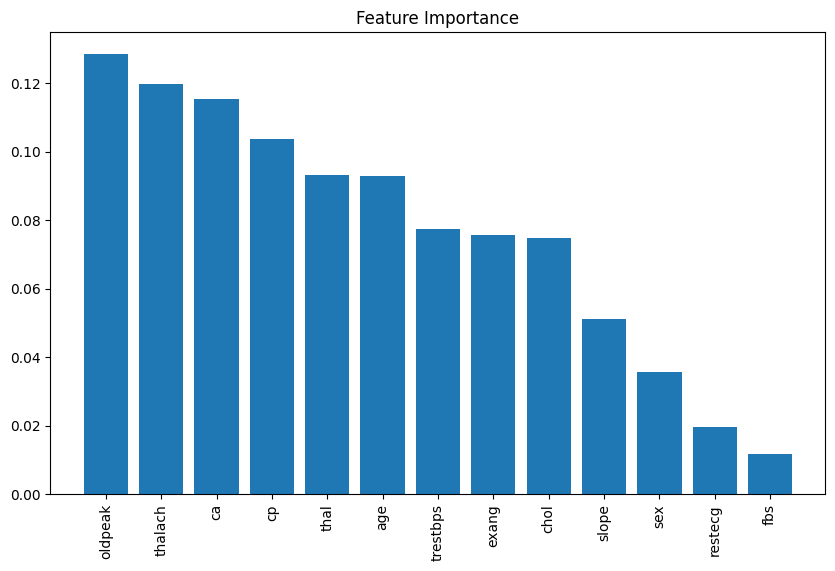

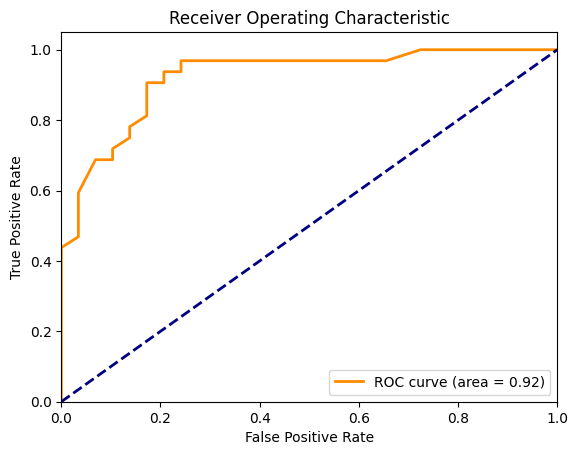

In [57]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

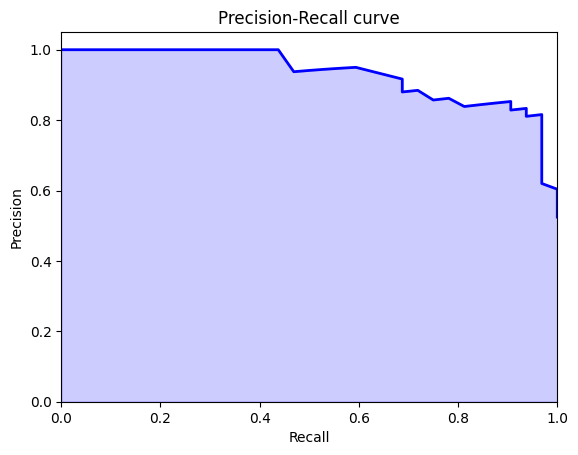

In [58]:
# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

In [59]:
# Get prediction probabilities
y_prob = model.predict_proba(X_test)[:, 1]

In [60]:
# Convert scaled X_test back to DataFrame to align with original feature names
X_test_df = pd.DataFrame(X_test, columns=data.columns[:-1])


In [61]:
# Add the probabilities to the test set
result_df = X_test_df.copy()
result_df['probability'] = y_prob
result_df['actual'] = y_test.values
result_df['predicted'] = y_pred

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.276218  0.722504 -0.971891  1.169491  0.553408 -0.383301 -1.046109   
1  0.493954  0.722504  1.968079  2.360389  0.781172 -0.383301 -1.046109   
2  0.276218  0.722504  0.988089  1.169491 -2.293633  2.608918  0.843133   
3  0.167350 -1.384075 -0.971891  0.216773  3.077785 -0.383301 -1.046109   
4  1.800367 -1.384075  0.988089 -1.212304  0.344625  2.608918 -1.046109   

    thalach     exang   oldpeak     slope        ca      thal  probability  \
0 -1.708752  1.477907 -0.375556 -0.694988  0.321860 -2.196576         0.05   
1  0.398289 -0.676632 -0.739095 -0.694988 -0.689701  1.178480         0.62   
2  1.025918 -0.676632 -0.739095  0.953905  0.321860  1.178480         0.55   
3 -0.005187  1.477907  0.805944 -0.694988  1.333421  1.178480         0.14   
4 -0.901800 -0.676632 -0.920864  0.953905  0.321860 -0.509048         0.79   

   actual  predicted  
0       0          0  
1       0          1  
2       1  

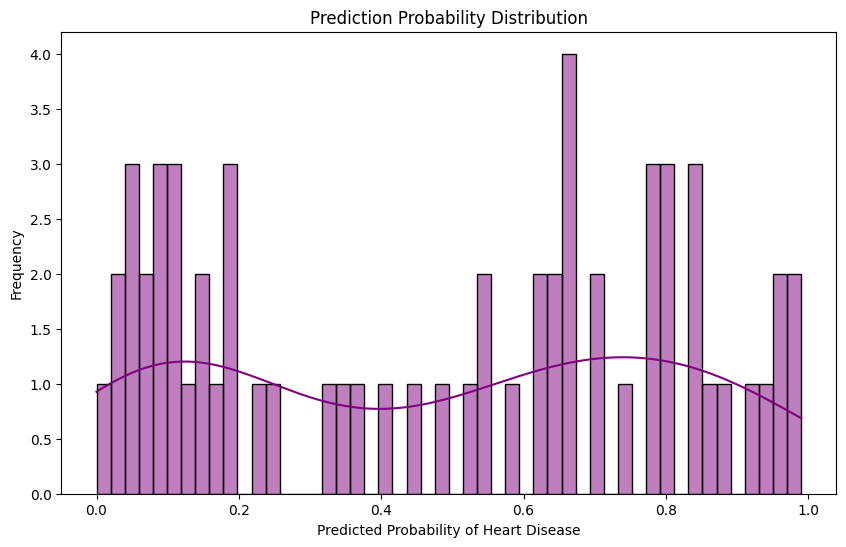

Patient at index 0 has a probability of heart disease: 0.05


In [62]:
# Display results
print(result_df.head())

# Plot prediction probability distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_prob, bins=50, kde=True, color='purple')
plt.title('Prediction Probability Distribution')
plt.xlabel('Predicted Probability of Heart Disease')
plt.ylabel('Frequency')
plt.show()

# For a specific patient example (e.g., the first patient in the test set)
patient_index = 0
patient_prob = y_prob[patient_index]
print(f'Patient at index {patient_index} has a probability of heart disease: {patient_prob:.2f}')

In [63]:
# Example patient data (replace these values with the actual patient's data)
new_patient_data = {
    'age': 45,
    'sex': 1,
    'cp': 3,
    'trestbps': 130,
    'chol': 230,
    'fbs': 0,
    'restecg': 1,
    'thalach': 170,
    'exang': 0,
    'oldpeak': 0.2,
    'slope': 2,
    'ca': 0,
    'thal': 2
}

# Convert the data to a DataFrame
new_patient_df = pd.DataFrame([new_patient_data])

# Standardize the new patient's data using the same scaler
new_patient_scaled = scaler.transform(new_patient_df)

# Make a prediction
new_patient_prob = model.predict_proba(new_patient_scaled)[:, 1]
new_patient_pred = model.predict(new_patient_scaled)

# Display the prediction
print(f'Probability of heart disease: {new_patient_prob[0]:.2f}')
print(f'Prediction (0 = No heart disease, 1 = Heart disease): {new_patient_pred[0]}')

if new_patient_pred[0] == 1:
    print("This person has heart disease.")
else:
    print("This person does not have heart disease.")


Probability of heart disease: 0.93
Prediction (0 = No heart disease, 1 = Heart disease): 1
This person has heart disease.


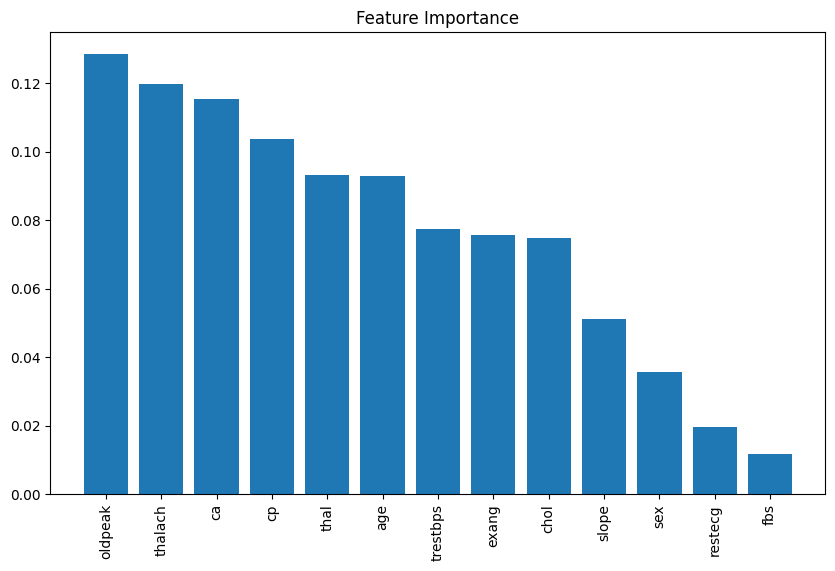

In [64]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
